In [36]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the iris dataset
iris_dataset = pd.read_csv('..\\..\\Datasets\\Iris.csv')
print(iris_dataset.shape)
iris_dataset.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Printing the info of the dataset
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Printing the basic statistics of the dataset  
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for the missing values in the dataset
print('Missing values in the dataset:', iris_dataset.isnull().sum().sum())

Missing values in the dataset: 0


-> Since there are no missing values in the dataset, we can proceed to the next stages of applying the clustering algorithms.

<hr>

## <b>Exercise 01: Implementing K-Means Clustering</b>
#### <b>Task:</b> Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features. Evaluate the clustering by comparing it to the actual species labels.

In [8]:
# Selecting two features: sepal length and sepal width
X = iris_dataset.iloc[:, [1, 2]].values

In [11]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

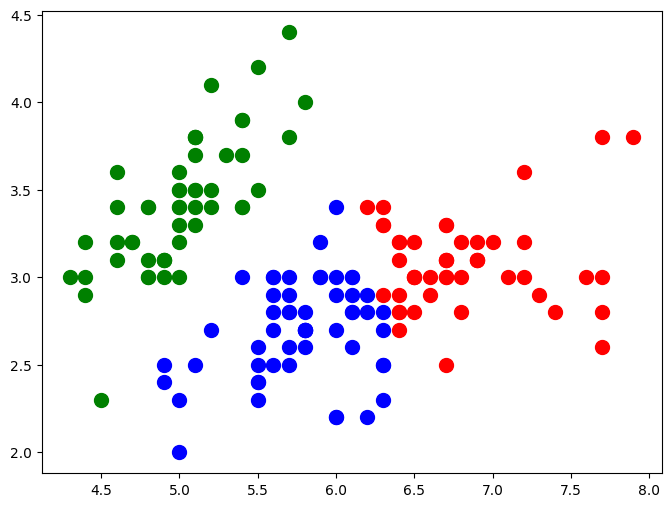

In [14]:
# Visualizing K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

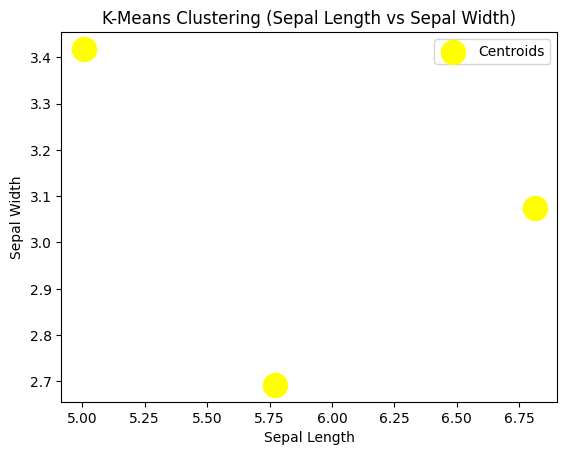

In [15]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

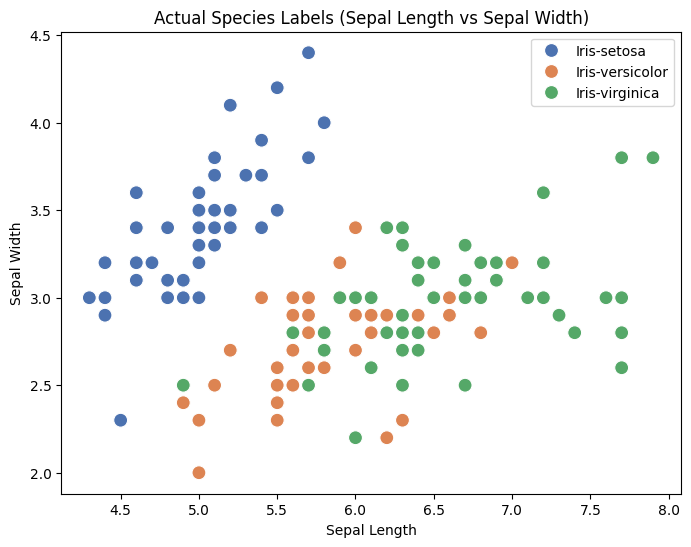

In [18]:
# Visualizing the actual species labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris_dataset, palette='deep', s=100)
plt.title('Actual Species Labels (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

-> <b>Cluster 1 (Red):</b> This cluster corresponds very closely to the Setosa species, which has distinctively smaller sepal lengths and widths compared to the other species. K-Means has accurately identified this cluster with minimal overlap with other species. <br><br>
-> <b>Cluster 2 (Blue) & Cluster 3 (Green):</b> These clusters correspond to Versicolor and Virginica. However, there is some overlap between these two species in terms of sepal dimensions, making it harder for K-Means to separate them cleanly. K-Means has grouped some Versicolor and Virginica species together because their sepal measurements are quite similar, causing some misclassification between these two clusters.

<hr>

## <b>Exercise 02: Choosing the Optimal Number of Clusters</b>
#### <b>Task:</b> Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. Visualize the Silhouette Score for different cluster counts.

In [20]:
# Data preprocessing (selecting features for clustering)
X = iris_dataset.iloc[:, [1, 2]].values  # Sepal length and width

In [21]:
# Elbow Method: Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

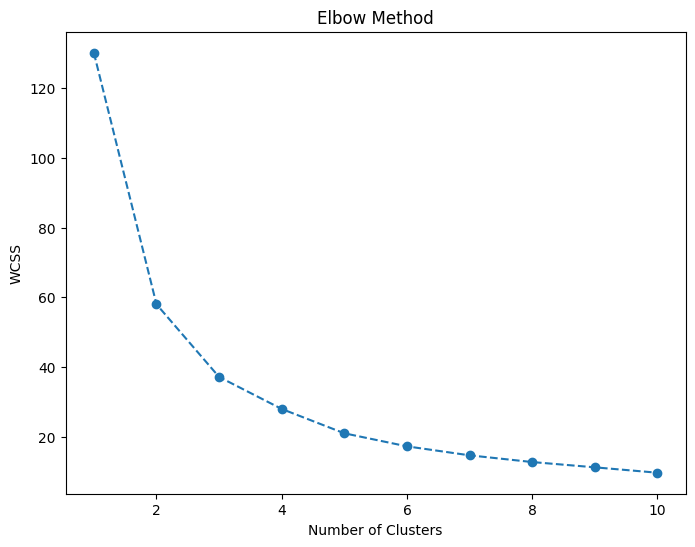

In [22]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

-> In the <b>Elbow Method</b> graph, we observe a sharp decline in WCSS from 1 to 3 clusters, after which the decrease becomes more gradual. This "elbow" at 3 clusters suggests that adding more clusters does not significantly reduce the WCSS, indicating that 3 clusters might be the optimal choice for the dataset.

In [23]:
# Silhouette Scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

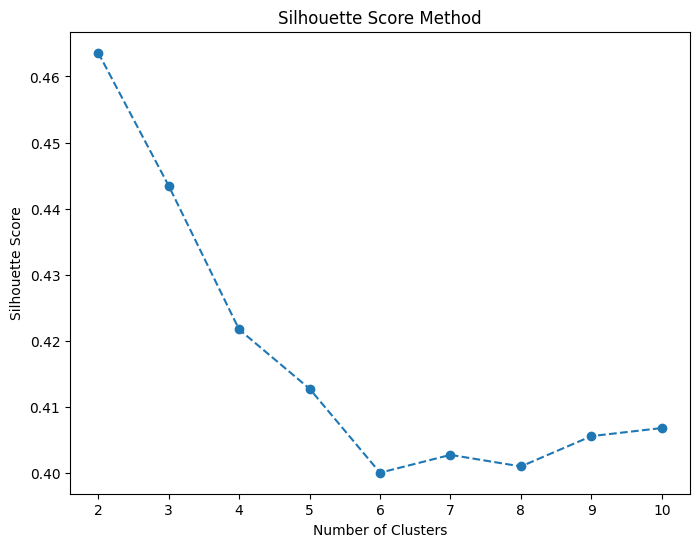

In [24]:
# Plotting the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

-> The <b>Silhouette Score</b> graph shows that the score is highest for 2 clusters, but it slightly decreases with more clusters. The score for 3 clusters is still relatively high, reinforcing the notion that 3 clusters is a reasonable choice. However, since the silhouette score decreases consistently beyond 3 clusters, it suggests that higher cluster counts may lead to less well-defined clustering.

<hr>

## <b>Exercise 03: Cluster Visualization with PCA</b>
#### <b>Task:</b> Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.

In [26]:
# Applying PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X)

In [27]:
# Performing K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

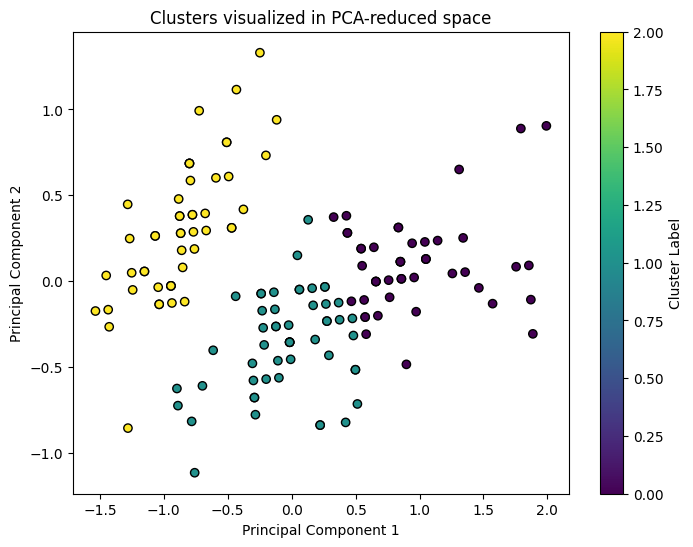

In [28]:
# Visualizing the clusters in PCA-reduced space
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Clusters visualized in PCA-reduced space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

-> The graph shows the clusters obtained from K-Means clustering visualized in the reduced 2D space using Principal Component Analysis (PCA). The three distinct clusters represent the three groups identified by K-Means in the Iris dataset, with different colors indicating the cluster assignments. The separation between clusters indicates that K-Means was able to differentiate the data points effectively. The color gradient suggests a smooth transition between the clusters, although some points near the boundaries may show overlap. Overall, PCA has successfully reduced the dimensionality, allowing clear visualization of the clustering.

<hr>

## <b>Exercise 04: Hierarchical Clustering: Dendrogram</b>
#### <b>Task:</b> Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.

In [31]:
# Selecting features for clustering
X = iris_dataset.iloc[:, [1, 2, 3, 4]].values  # Using all features

In [33]:
# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Performing hierarchical clustering
linked = linkage(X_scaled, method='ward')

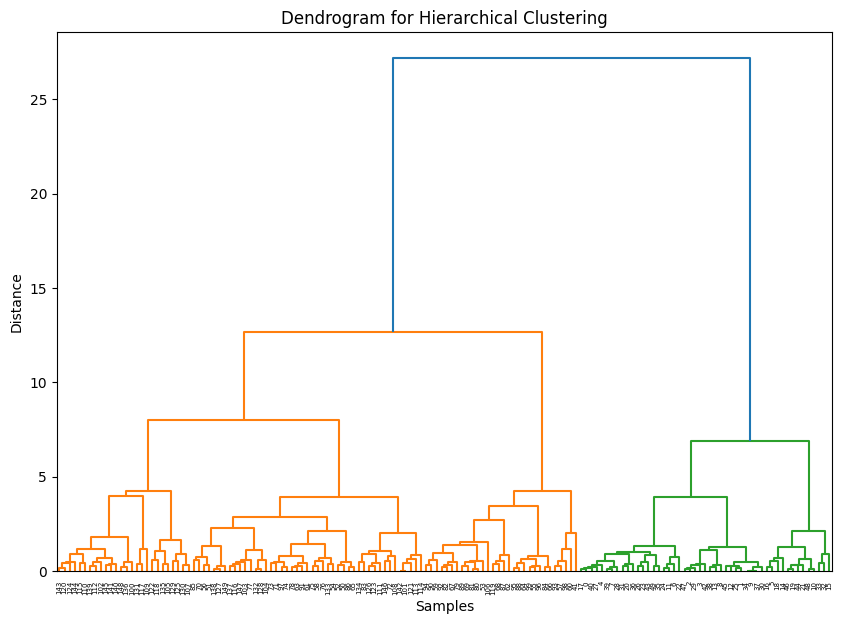

In [35]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

-> Each leaf node corresponds to an individual sample, while the branches illustrate the merging of clusters at various levels of dissimilarity. The height at which two clusters merge indicates their distance; clusters that are closer together will merge at a lower height, suggesting greater similarity. By analyzing the dendrogram, one can identify optimal cluster separations, typically marked by significant vertical gaps. In this case, the dendrogram will likely reveal three distinct clusters, aligning with the known species in the dataset: Setosa, Versicolor, and Virginica.

<hr>

## <b>Exercise 05: Comparing Clustering Algorithms</b>
#### <b>Task:</b> Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.

In [37]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [38]:
# K-Means Performance
kmeans_silhouette = silhouette_score(X, kmeans_labels)

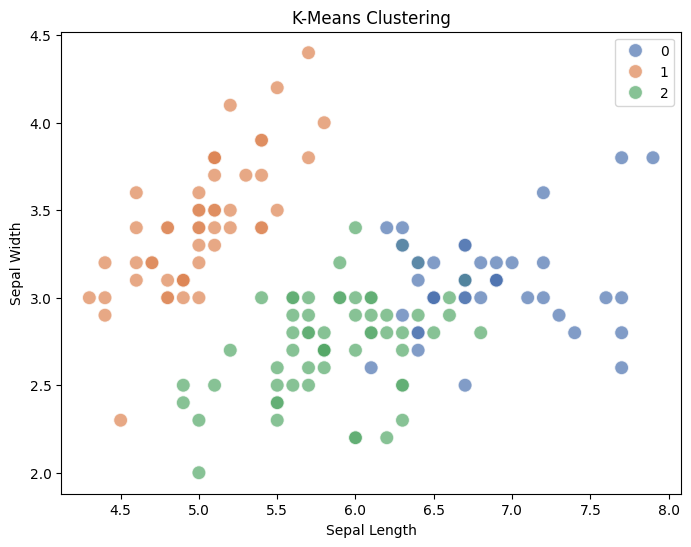

In [41]:
# Visualizing K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette='deep', s=100, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [39]:
# Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

In [40]:
# Agglomerative Clustering Performance
agglo_silhouette = silhouette_score(X, agglo_labels)

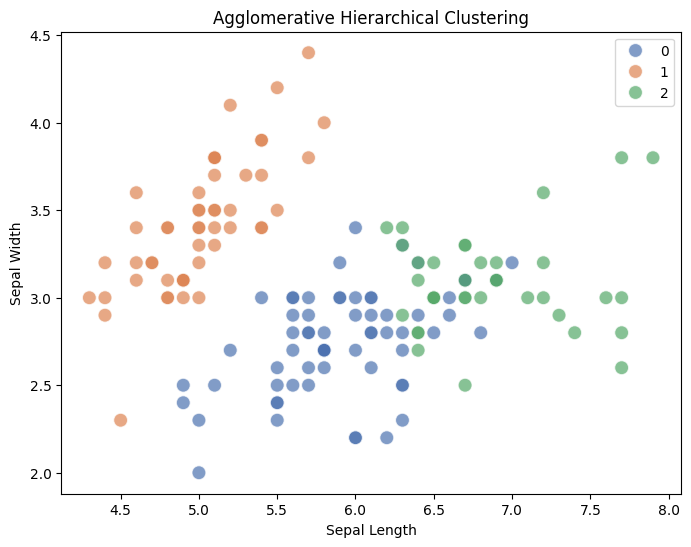

In [42]:
# Visualizing Agglomerative clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agglo_labels, palette='deep', s=100, alpha=0.7)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [43]:
# Print Silhouette Scores
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Agglomerative Hierarchical Clustering Silhouette Score: {agglo_silhouette:.2f}")

K-Means Silhouette Score: 0.55
Agglomerative Hierarchical Clustering Silhouette Score: 0.55


<p><b> 1) K-Means Clustering:</b>

<b>Strengths:</b><br>
- Generally faster and more efficient on large datasets.<br>
- Easy to implement and interpret.<br>
- Suitable for spherical clusters.<br><br></p>
<b>Weaknesses:</b>
- Requires the number of clusters to be specified in advance.<br>
- Sensitive to initial centroid placement and may converge to local minima.<br>
- Assumes clusters are of similar size and density, which may not always be the case.<br>

<b> 2) Agglomerative Hierarchical Clustering: </b>

<b>Strengths:</b><br>
- Does not require the number of clusters to be specified beforehand.<br>
- Provides a detailed tree structure (dendrogram) that can give insights into data relationships.<br>
- Can find arbitrarily shaped clusters and is not limited to spherical shapes.<br><br>
<b>Weaknesses:</b>
- Computationally more expensive, especially with large datasets.<br>
- Sensitive to noise and outliers, which can skew the results.<br>
- Produces a full hierarchy, which may not always be necessary or useful for analysis.<br>
</p>

### <b>Conclusion</b>
-> Both K-Means and Agglomerative Hierarchical Clustering achieved a silhouette score of 0.55, indicating that both algorithms perform similarly in terms of clustering quality on the Iris dataset. This score suggests that the clusters are reasonably well-defined, with points being closer to their own cluster than to others. However, while a silhouette score above 0.5 generally indicates acceptable clustering, there is still room for improvement. The similar performance highlights that both methods are capturing the underlying structure of the data effectively, despite their different approaches.

<hr>